In [5]:
import requests
from bs4 import BeautifulSoup

main_url = 'https://www.jalan.net/?ccnt=global_navi'
response = requests.get(main_url)
response.encoding = response.apparent_encoding  
soup = BeautifulSoup(response.text, 'html.parser')
print(soup.prettify())  


<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html lang="ja" xml:lang="ja" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="ja" http-equiv="Content-Language"/>
  <meta content="text/javascript" http-equiv="Content-Script-Type"/>
  <meta content="text/css" http-equiv="Content-Style-Type"/>
  <meta content="ホテル,ホテル予約,じゃらん" name="keywords"/>
  <meta content="宿・ホテル予約ならじゃらんnet。当日予約や今だけのじゃらん限定プランも。航空券や新幹線と宿泊のセットでさらにお得に。リッチな温泉旅館から便利なビジネスホテルまで目的に合わせて簡単検索。豊富な観光情報と口コミであなたの旅行をサポートします。" name="description"/>
  <meta content="nositelinkssearchbox" name="google"/>
  <!--[Title]-->
  <title>
   宿・ホテル予約 - 旅行ならじゃらんnet
  </title>
  <!--/[Title]-->
  <meta content="#ff5800" name="theme-color"/>
  <link href="/favicon.ico" rel="shortcut icon" type="image/vnd.microsoft.icon"/>
  <link href="/fa

In [6]:
# 特定のクラスを持つ <a> タグをすべて見つける
a_tags = soup.find_all('a')

for tag in a_tags:
    href = tag.get('href')  # href属性を取得する
    if href.startswith('/travel'):
        href = tag.get('href') 
        print(href)  # href属性を表示する

In [7]:
for tag in a_tags:
    href = tag.get('href')
    print(f"Found href: {href}")  # どのような href が見つかっているか確認
    if href and href.startswith('/travel'):
        print(href)  # `/travel`で始まるhref属性を表示する

Found href: /en/japan_hotels_ryokan/?cc=eng_banner
Found href: /en/japan_hotels_ryokan/?cc=eng_banner
Found href: /cn/japan_hotels_ryokan/?cc=chi_banner
Found href: /cn/japan_hotels_ryokan/?cc=chi_banner
Found href: /tn/japan_hotels_ryokan/?cc=tai_banner
Found href: /tn/japan_hotels_ryokan/?cc=tai_banner
Found href: /kr/japan_hotels_ryokan/?cc=kor_banner
Found href: /kr/japan_hotels_ryokan/?cc=kor_banner
Found href: /id/japan_hotels_ryokan/?cc=idn_banner
Found href: /id/japan_hotels_ryokan/?cc=idn_banner
Found href: /th/japan_hotels_ryokan/?cc=tha_banner
Found href: /th/japan_hotels_ryokan/?cc=tha_banner
Found href: /my/japan_hotels_ryokan/?cc=mys_banner
Found href: /my/japan_hotels_ryokan/?cc=mys_banner
Found href: http://itunes.apple.com/jp/app/id366264405
Found href: market://details?id=net.jalan.android
Found href: /ikisaki/map/hokkaido/
Found href: /ikisaki/map/aomori/
Found href: /ikisaki/map/iwate/
Found href: /ikisaki/map/miyagi/
Found href: /ikisaki/map/akita/
Found href: /iki

##  それぞれの観光地のURLを取得

In [8]:
# <a> タグをすべて取得
a_tags = soup.find_all('a')

# 各<a>タグのhref属性とテキストを出力
for a_tag in a_tags:
    href = a_tag.get('href')
    if href.startswith('/ikisaki'):

        href = a_tag.get('href') 
        text = a_tag.get_text(strip=True)
        print(f"リンク: {href}, テキスト: {text}")

リンク: /ikisaki/map/hokkaido/, テキスト: 北海道
リンク: /ikisaki/map/aomori/, テキスト: 青森
リンク: /ikisaki/map/iwate/, テキスト: 岩手
リンク: /ikisaki/map/miyagi/, テキスト: 宮城
リンク: /ikisaki/map/akita/, テキスト: 秋田
リンク: /ikisaki/map/yamagata/, テキスト: 山形
リンク: /ikisaki/map/fukushima/, テキスト: 福島
リンク: /ikisaki/map/tochigi/, テキスト: 栃木
リンク: /ikisaki/map/gunma/, テキスト: 群馬
リンク: /ikisaki/map/ibaraki/, テキスト: 茨城
リンク: /ikisaki/map/yamanashi/, テキスト: 山梨
リンク: /ikisaki/map/nagano/, テキスト: 長野
リンク: /ikisaki/map/niigata/, テキスト: 新潟
リンク: /ikisaki/map/saitama/, テキスト: 埼玉
リンク: /ikisaki/map/chiba/, テキスト: 千葉
リンク: /ikisaki/map/tokyo/, テキスト: 東京
リンク: /ikisaki/map/kanagawa/, テキスト: 神奈川
リンク: /ikisaki/map/shizuoka/, テキスト: 静岡
リンク: /ikisaki/map/gifu/, テキスト: 岐阜
リンク: /ikisaki/map/aichi/, テキスト: 愛知
リンク: /ikisaki/map/mie/, テキスト: 三重
リンク: /ikisaki/map/toyama/, テキスト: 富山
リンク: /ikisaki/map/ishikawa/, テキスト: 石川
リンク: /ikisaki/map/fukui/, テキスト: 福井
リンク: /ikisaki/map/shiga/, テキスト: 滋賀
リンク: /ikisaki/map/kyoto/, テキスト: 京都
リンク: /ikisaki/map/oosaka/, テキスト: 大阪
リンク: /ikisaki/map/hy

In [12]:
import requests
from bs4 import BeautifulSoup
import sqlite3
import time

# SQLiteデータベースに接続
conn = sqlite3.connect('foreigners.db')
cursor = conn.cursor()

# テーブルがすでに存在している場合は削除し、再作成
cursor.execute('DROP TABLE IF EXISTS prefecture_foreigners;')

# 観光客データを格納するテーブルを作成
cursor.execute('''
CREATE TABLE prefecture_foreigners (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    prefecture_name TEXT,
    ranking INTEGER,
    number TEXT
);
''')

# 外国人観光客数を取得するURL
Tourist_count_Foreigners = "https://eleminist.com/article/3778"

# URLからデータを取得
request_Foreigners = requests.get(Tourist_count_Foreigners)
request_Foreigners.encoding = 'utf-8'

# BeautifulSoupでHTMLを解析
soup_Foreigners = BeautifulSoup(request_Foreigners.text, 'html.parser')

# tbodyタグを取得
tbody = soup_Foreigners.find('tbody')
seen_prefectures = set()
previous_rank = None

# データをデータベースに挿入または更新
for tr in tbody.find_all('tr'):
    td_tags = tr.find_all('td')

    if len(td_tags) == 3:
        # ランキングの取得
        rank_F = td_tags[0].get_text(strip=True)
        if rank_F == "":
            rank_F = previous_rank

        # 都道府県名の取得
        prefecture_F = td_tags[1].get_text(strip=True)
        # 観光客数（number）の取得
        number_F = td_tags[2].get_text(strip=True)

        # "全国" や "編集管理ページへ" を除外する条件を追加
        if prefecture_F == "" or prefecture_F == "全国" or prefecture_F == "編集管理ページへ":
            continue

        # 重複していない都道府県名のみ処理
        if prefecture_F not in seen_prefectures:
            print(f"Ranking: {rank_F}, Prefecture: {prefecture_F}, Number: {number_F}")

            # 観光客データをprefecture_foreignersテーブルに挿入
            cursor.execute('''
            INSERT INTO prefecture_foreigners (prefecture_name, ranking, number)
            VALUES (?, ?, ?);
            ''', (prefecture_F, rank_F, number_F))

            seen_prefectures.add(prefecture_F)

        # 前回のランキングを保存
        previous_rank = rank_F

        # サーバーに負担をかけないために0.5秒の遅延を追加
        time.sleep(0.5)

# データベースの変更をコミット
conn.commit()

# データベース接続を閉じる
conn.close()


Ranking: １, Prefecture: 東京都, Number: 42,727,680
Ranking: ２, Prefecture: 大阪府, Number: 18,480,840
Ranking: 3, Prefecture: 京都府, Number: 12,119,590
Ranking: 4, Prefecture: 北海道, Number: 6,775,200
Ranking: 5, Prefecture: 福岡県, Number: 4,737,990
Ranking: 6, Prefecture: 沖縄県, Number: 4,148,110
Ranking: 7, Prefecture: 千葉県, Number: 3,241,150
Ranking: 8, Prefecture: 神奈川県, Number: 2,665,810
Ranking: 9, Prefecture: 愛知県, Number: 1,984,390
Ranking: 10, Prefecture: 長野県, Number: 1,417,120
Ranking: 11, Prefecture: 山梨県, Number: 1,325,830
Ranking: 12, Prefecture: 広島県, Number: 1,292,470
Ranking: 13, Prefecture: 大分県, Number: 1,281,000
Ranking: 14, Prefecture: 岐阜県, Number: 1,108,050
Ranking: 15, Prefecture: 石川県, Number: 1,034,530
Ranking: 16, Prefecture: 静岡県, Number: 1,027,640
Ranking: 17, Prefecture: 兵庫県, Number: 1,024,830
Ranking: 18, Prefecture: 熊本県, Number: 961,870
Ranking: 19, Prefecture: 宮城県, Number: 518,330
Ranking: 20, Prefecture: 和歌山県, Number: 494,300
Ranking: 21, Prefecture: 長崎県, Number: 461,970
Rank

In [18]:
import math
import requests
from bs4 import BeautifulSoup
import sqlite3
import time

# SQLiteデータベースに接続
conn = sqlite3.connect('foreigners.db')
cursor = conn.cursor()

# テーブルがすでに存在している場合は削除し、再作成
cursor.execute('DROP TABLE IF EXISTS prefecture_foreigners;')

# 観光客データを格納するテーブルを作成
cursor.execute('''
CREATE TABLE prefecture_foreigners (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    prefecture_name TEXT,
    ranking INTEGER,
    number TEXT
);
''')

# 外国人観光客数を取得するURL
Tourist_count_Foreigners = "https://eleminist.com/article/3778"

# URLからデータを取得
request_Foreigners = requests.get(Tourist_count_Foreigners)
request_Foreigners.encoding = 'utf-8'

# BeautifulSoupでHTMLを解析
soup_Foreigners = BeautifulSoup(request_Foreigners.text, 'html.parser')

# tbodyタグを取得
tbody = soup_Foreigners.find('tbody')
seen_prefectures = set()
previous_rank = None

# データをデータベースに挿入または更新
for tr in tbody.find_all('tr'):
    td_tags = tr.find_all('td')

    if len(td_tags) == 3:
        # ランキングの取得
        rank_F = td_tags[0].get_text(strip=True)
        if rank_F == "":
            rank_F = previous_rank

        # 都道府県名の取得
        prefecture_F = td_tags[1].get_text(strip=True)
        # 観光客数（number）の取得
        number_F = td_tags[2].get_text(strip=True)

        # "全国" や "編集管理ページへ" を除外する条件を追加
        if prefecture_F == "" or prefecture_F == "全国" or prefecture_F == "編集管理ページへ":
            continue

        # 重複していない都道府県名のみ処理
        if prefecture_F not in seen_prefectures:
            print(f"Ranking: {rank_F}, Prefecture: {prefecture_F}, Number: {number_F}")

            # 観光客データをprefecture_foreignersテーブルに挿入
            cursor.execute('''
            INSERT INTO prefecture_foreigners (prefecture_name, ranking, number)
            VALUES (?, ?, ?);
            ''', (prefecture_F, rank_F, number_F))

            seen_prefectures.add(prefecture_F)

        # 前回のランキングを保存
        previous_rank = rank_F

        # サーバーに負担をかけないために0.5秒の遅延を追加
        time.sleep(0.5)

# データベースの変更をコミット
conn.commit()

# 総外国人観光客数、平均、標準偏差を計算
total_foreigners = 0
total_prefectures = 0  # 都道府県数をカウント
numbers = []  # 外国人観光客数のリストを保持
cursor.execute('SELECT number FROM prefecture_foreigners')
rows = cursor.fetchall()

for row in rows:
    number_str = row[0]  # numberの値を文字列として取得
    number_str = number_str.replace(',', '')  # カンマを削除
    try:
        number = int(number_str)  # 整数に変換
        total_foreigners += number  # 総数に加算
        total_prefectures += 1  # 都道府県数をカウント
        numbers.append(number)  # 外国人観光客数をリストに追加
    except ValueError:
        print(f"Skipping invalid number: {number_str}")

# 平均外国人観光客数の計算
if total_prefectures > 0:
    average_foreigners = total_foreigners / total_prefectures
else:
    average_foreigners = 0  # データがない場合は0

# 標準偏差の計算
if total_prefectures > 1:  # 標準偏差は2つ以上のデータが必要
    variance = sum((x - average_foreigners) ** 2 for x in numbers) / total_prefectures
    standard_deviation = math.sqrt(variance)
else:
    standard_deviation = 0  # データが1つ以下の場合は標準偏差は0

# 結果を表示
print(f"総外国人観光客数: {total_foreigners}")
print(f"平均外国人観光客数: {average_foreigners:.2f}")
print(f"標準偏差: {standard_deviation:.2f}")

# データベース接続を閉じる
conn.close()


Ranking: １, Prefecture: 東京都, Number: 42,727,680
Ranking: ２, Prefecture: 大阪府, Number: 18,480,840
Ranking: 3, Prefecture: 京都府, Number: 12,119,590
Ranking: 4, Prefecture: 北海道, Number: 6,775,200
Ranking: 5, Prefecture: 福岡県, Number: 4,737,990
Ranking: 6, Prefecture: 沖縄県, Number: 4,148,110
Ranking: 7, Prefecture: 千葉県, Number: 3,241,150
Ranking: 8, Prefecture: 神奈川県, Number: 2,665,810
Ranking: 9, Prefecture: 愛知県, Number: 1,984,390
Ranking: 10, Prefecture: 長野県, Number: 1,417,120


KeyboardInterrupt: 

Ranking: １, Prefecture: 東京都, Number: 42,727,680
Ranking: ２, Prefecture: 大阪府, Number: 18,480,840
Ranking: 3, Prefecture: 京都府, Number: 12,119,590
Ranking: 4, Prefecture: 北海道, Number: 6,775,200
Ranking: 5, Prefecture: 福岡県, Number: 4,737,990
Ranking: 6, Prefecture: 沖縄県, Number: 4,148,110
Ranking: 7, Prefecture: 千葉県, Number: 3,241,150
Ranking: 8, Prefecture: 神奈川県, Number: 2,665,810
Ranking: 9, Prefecture: 愛知県, Number: 1,984,390
Ranking: 10, Prefecture: 長野県, Number: 1,417,120
Ranking: 11, Prefecture: 山梨県, Number: 1,325,830
Ranking: 12, Prefecture: 広島県, Number: 1,292,470
Ranking: 13, Prefecture: 大分県, Number: 1,281,000
Ranking: 14, Prefecture: 岐阜県, Number: 1,108,050
Ranking: 15, Prefecture: 石川県, Number: 1,034,530
Ranking: 16, Prefecture: 静岡県, Number: 1,027,640
Ranking: 17, Prefecture: 兵庫県, Number: 1,024,830
Ranking: 18, Prefecture: 熊本県, Number: 961,870
Ranking: 19, Prefecture: 宮城県, Number: 518,330
Ranking: 20, Prefecture: 和歌山県, Number: 494,300
Ranking: 21, Prefecture: 長崎県, Number: 461,970
Rank

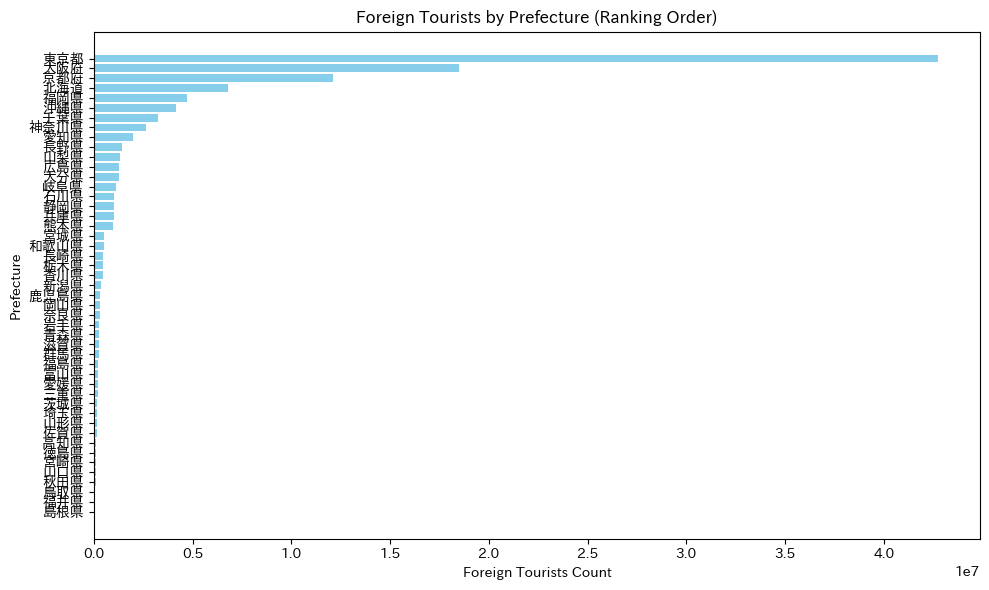

In [23]:
import requests
from bs4 import BeautifulSoup
import sqlite3
import time
import matplotlib.pyplot as plt
import japanize_matplotlib

# SQLiteデータベースに接続
conn = sqlite3.connect('foreigners.db')
cursor = conn.cursor()

# テーブルがすでに存在している場合は削除し、再作成
cursor.execute('DROP TABLE IF EXISTS prefecture_foreigners;')

# 観光客データを格納するテーブルを作成
cursor.execute('''
CREATE TABLE prefecture_foreigners (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    prefecture_name TEXT,
    ranking INTEGER,
    number TEXT
);
''')

# 外国人観光客数を取得するURL
Tourist_count_Foreigners = "https://eleminist.com/article/3778"

# URLからデータを取得
request_Foreigners = requests.get(Tourist_count_Foreigners)
request_Foreigners.encoding = 'utf-8'

# BeautifulSoupでHTMLを解析
soup_Foreigners = BeautifulSoup(request_Foreigners.text, 'html.parser')

# tbodyタグを取得
tbody = soup_Foreigners.find('tbody')
seen_prefectures = set()
previous_rank = None

# データをデータベースに挿入または更新
for tr in tbody.find_all('tr'):
    td_tags = tr.find_all('td')

    if len(td_tags) == 3:
        # ランキングの取得
        rank_F = td_tags[0].get_text(strip=True)
        if rank_F == "":
            rank_F = previous_rank

        # 都道府県名の取得
        prefecture_F = td_tags[1].get_text(strip=True)
        # 観光客数（number）の取得
        number_F = td_tags[2].get_text(strip=True)

        # "全国" や "編集管理ページへ" を除外する条件を追加
        if prefecture_F == "" or prefecture_F == "全国" or prefecture_F == "編集管理ページへ":
            continue

        # 重複していない都道府県名のみ処理
        if prefecture_F not in seen_prefectures:
            print(f"Ranking: {rank_F}, Prefecture: {prefecture_F}, Number: {number_F}")

            # 観光客データをprefecture_foreignersテーブルに挿入
            cursor.execute('''
            INSERT INTO prefecture_foreigners (prefecture_name, ranking, number)
            VALUES (?, ?, ?);
            ''', (prefecture_F, rank_F, number_F))

            seen_prefectures.add(prefecture_F)

        # 前回のランキングを保存
        previous_rank = rank_F

        # サーバーに負担をかけないために0.5秒の遅延を追加
        time.sleep(0.5)

# データベースの変更をコミット
conn.commit()

# 外国人観光客数を取得（並べ替えせずに挿入順に取得）
cursor.execute('SELECT prefecture_name, number FROM prefecture_foreigners')
rows = cursor.fetchall()

# 観光客数のリスト
prefecture_names = []
tourist_numbers = []

# 各都道府県のデータをリストに格納
for row in rows:
    prefecture_names.append(row[0])
    number_str = row[1].replace(',', '')  # カンマを削除
    try:
        tourist_numbers.append(int(number_str))  # 整数に変換
    except ValueError:
        tourist_numbers.append(0)  # 数値変換できなかった場合は0

# 棒グラフをプロット
plt.figure(figsize=(10, 6))  # グラフのサイズを設定
plt.barh(prefecture_names, tourist_numbers, color='skyblue')  # 横棒グラフ
plt.xlabel('Foreign Tourists Count')  # X軸のラベル
plt.ylabel('Prefecture')  # Y軸のラベル
plt.title('Foreign Tourists by Prefecture (Ranking Order)')  # グラフのタイトル
plt.gca().invert_yaxis()  # ランキング順に表示するためY軸を反転
plt.tight_layout()  # レイアウトを調整

# グラフを表示
plt.show()

# データベース接続を閉じる
conn.close()
